<center><h1 style="font-size:2em;color:#2467C0;font-family:Times New Roman">Tagesaufgaben K-Means</center>

In [1]:
# imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score

<div class="alert alert-success" role="alert">
  <h4 class="alert-heading" style="font-size:1.7em">Aufgabe 1 </h4>
  <hr>
   <h4 style="font-family:courier;font-size:1.3em">
Verwende den penguins-Datensatz, um mit dem K-Means-Algorithmus Cluster in den Daten zu finden.<br> <br>
Zeichne ein Ellbogendiagramm und ermittele daraus den optimalen Wert von k.<br> <br>
Plotte das Ergebnis deiner Clusteranalyse mit einem Pairplot und vergleiche das Ergebnis mit einem Pairplot der originalen Pinguindaten, gefärbt nach island.</h4>
</div>

In [2]:
# load data
pengu = sns.load_dataset("penguins")
pengu.dropna(inplace=True)
unknown_pengu = pengu.select_dtypes("number")

In [3]:
# look @ raw data
pengu

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [4]:
# look @ unknown data
unknown_pengu.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


In [5]:
# transform data
scaler = MinMaxScaler()
scaled_pengu = scaler.fit_transform(unknown_pengu)
scaled_pengu

array([[0.25454545, 0.66666667, 0.15254237, 0.29166667],
       [0.26909091, 0.51190476, 0.23728814, 0.30555556],
       [0.29818182, 0.58333333, 0.38983051, 0.15277778],
       ...,
       [0.66545455, 0.30952381, 0.84745763, 0.84722222],
       [0.47636364, 0.20238095, 0.6779661 , 0.69444444],
       [0.64727273, 0.35714286, 0.69491525, 0.75      ]], shape=(333, 4))

In [6]:
# transform in df
scaled_pengu = pd.DataFrame(scaled_pengu, columns=unknown_pengu.columns)
scaled_pengu

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,0.254545,0.666667,0.152542,0.291667
1,0.269091,0.511905,0.237288,0.305556
2,0.298182,0.583333,0.389831,0.152778
3,0.167273,0.738095,0.355932,0.208333
4,0.261818,0.892857,0.305085,0.263889
...,...,...,...,...
328,0.549091,0.071429,0.711864,0.618056
329,0.534545,0.142857,0.728814,0.597222
330,0.665455,0.309524,0.847458,0.847222
331,0.476364,0.202381,0.677966,0.694444


In [7]:
# prepare X
X = scaled_pengu
X

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,0.254545,0.666667,0.152542,0.291667
1,0.269091,0.511905,0.237288,0.305556
2,0.298182,0.583333,0.389831,0.152778
3,0.167273,0.738095,0.355932,0.208333
4,0.261818,0.892857,0.305085,0.263889
...,...,...,...,...
328,0.549091,0.071429,0.711864,0.618056
329,0.534545,0.142857,0.728814,0.597222
330,0.665455,0.309524,0.847458,0.847222
331,0.476364,0.202381,0.677966,0.694444


In [8]:
# k_means clustering
pengu_kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
pengu_kmeans.fit(X)

KMeans(n_clusters=3, n_init=10, random_state=42)

In [9]:
# add cluster feature
scaled_pengu["clusters"] = pengu_kmeans.predict(X)
scaled_pengu

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,clusters
0,0.254545,0.666667,0.152542,0.291667,0
1,0.269091,0.511905,0.237288,0.305556,0
2,0.298182,0.583333,0.389831,0.152778,0
3,0.167273,0.738095,0.355932,0.208333,0
4,0.261818,0.892857,0.305085,0.263889,0
...,...,...,...,...,...
328,0.549091,0.071429,0.711864,0.618056,1
329,0.534545,0.142857,0.728814,0.597222,1
330,0.665455,0.309524,0.847458,0.847222,1
331,0.476364,0.202381,0.677966,0.694444,1


In [10]:
# look @ cluster
scaled_pengu.clusters.unique()

array([0, 2, 1], dtype=int32)

In [11]:
# cluster_centers
pengu_kmeans.cluster_centers_

array([[0.22690909, 0.58542857, 0.27294915, 0.23727778],
       [0.56247517, 0.22579032, 0.7666999 , 0.66456583],
       [0.54733401, 0.68646335, 0.42848981, 0.34449126]])

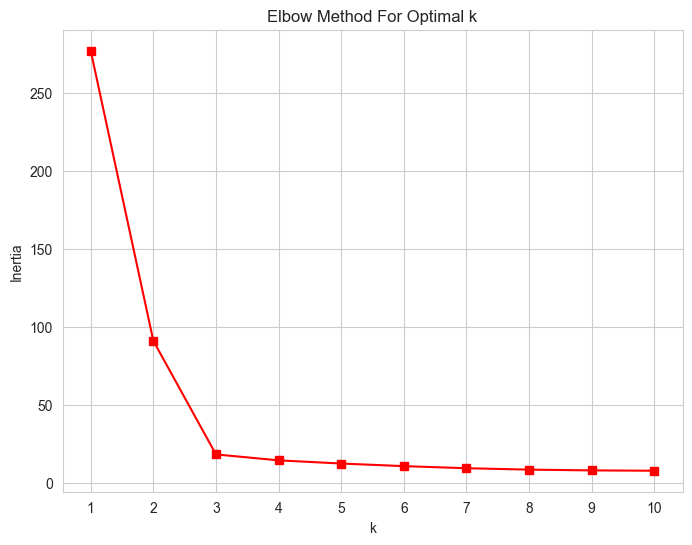

In [12]:
# calculate inertias for different k values
inertias_values = []
K = range(1, 11)

for k in K:
	kmeans = KMeans(n_clusters=k, random_state=42)
	kmeans.fit(X)
	inertias_values.append(kmeans.inertia_)

# plot elbow curve    
plt.figure(figsize=(8, 6))
plt.plot(K, inertias_values, 'rs-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.xticks(range(1, 11))
plt.show()

In [13]:
# look @ inertia_values
inertias_values

[276.82868138839734,
 91.02735985833746,
 18.25075905048071,
 14.453090881749382,
 12.4114650932406,
 10.745426168954207,
 9.407566627851082,
 8.499721240674466,
 8.014965910290204,
 7.80701612698015]

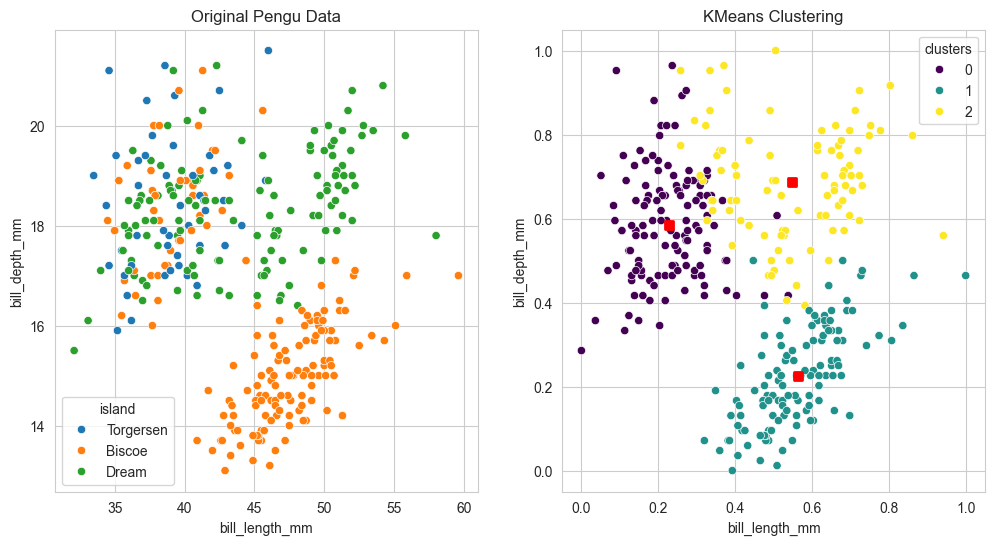

In [14]:
# create figure with 2 subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# plot original pengu data
sns.scatterplot(data=pengu, x="bill_length_mm", y="bill_depth_mm", hue="island", ax=ax1)

# plot clustered data  
sns.scatterplot(data=scaled_pengu, x="bill_length_mm", y="bill_depth_mm", hue="clusters", ax=ax2, palette="viridis")

# plot cluster centers
centers = pengu_kmeans.cluster_centers_
ax2.scatter(centers[:, 0], centers[:, 1], c='red', marker='s', s=30, linewidth=2)

# set titles for both plots
ax1.set_title("Original Pengu Data")
ax2.set_title("KMeans Clustering")

plt.show()


<div class="alert alert-success" role="alert">
  <h4 class="alert-heading" style="font-size:1.7em">Aufgabe 2 </h4>
  <hr>
   <h4 style="font-family:courier;font-size:1.3em">
Clustere den Datensatz linear_split1.csv mit dem kmeans-Algorithmus mit einer Anzahl von 4 Clustern.<br><br>
    Bestimme außerdem die optimale Anzahl Cluster.</h4>
</div>

In [15]:
# load and preprocess data
data = pd.read_csv("linear_split1.csv")
data

,x,y
0,0.071041,0.428403
1,0.520426,0.503603
2,0.402163,0.892673
3,0.787102,0.450862
4,0.194824,0.957842
...,...,...
295,0.746110,0.128496
296,0.345853,0.654239
297,0.750912,0.211071
298,0.182986,0.337362


In [16]:
# scale the data
X = data.values
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# k-means clustering with k=4
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_scaled)

KMeans(n_clusters=4, random_state=42)

In [17]:
# calculate inertias for different k values
inertias = []
K = range(1, 11)

for k in K:
	model = KMeans(n_clusters=k, random_state=42)
	model.fit(X_scaled)
	inertias.append(model.inertia_)

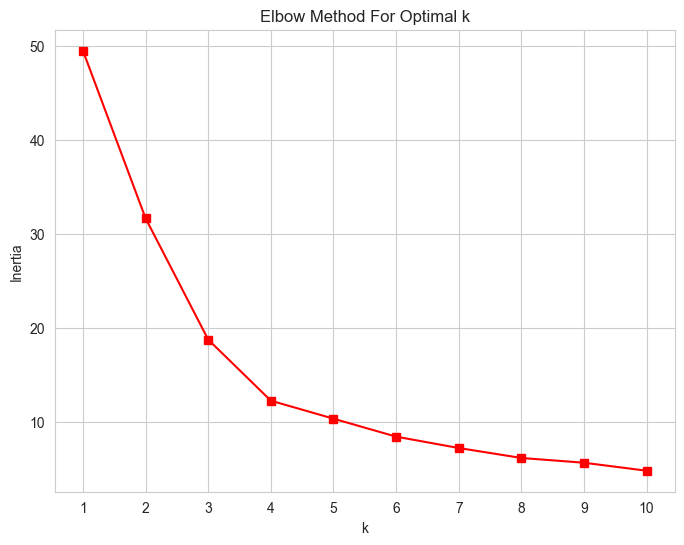

In [18]:
# plot elbow curve
plt.figure(figsize=(8, 6))
plt.plot(K, inertias, "rs-")
plt.xlabel("k")
plt.ylabel("Inertia")
plt.title("Elbow Method For Optimal k")
plt.grid(True)
plt.xticks(range(1, 11))
plt.show()

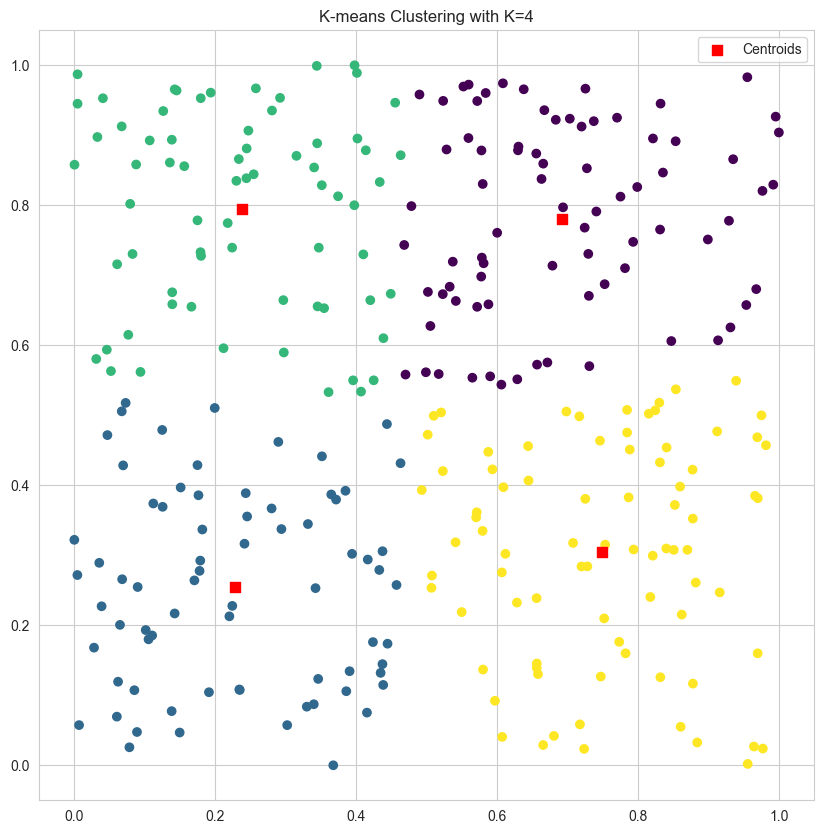

In [19]:
# scatter plot of clusters
plt.figure(figsize=(10, 10))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels_, cmap="viridis")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
			c="red", marker="s", s=50, label="Centroids")
plt.title("K-means Clustering with K=4")
plt.legend()
plt.show()

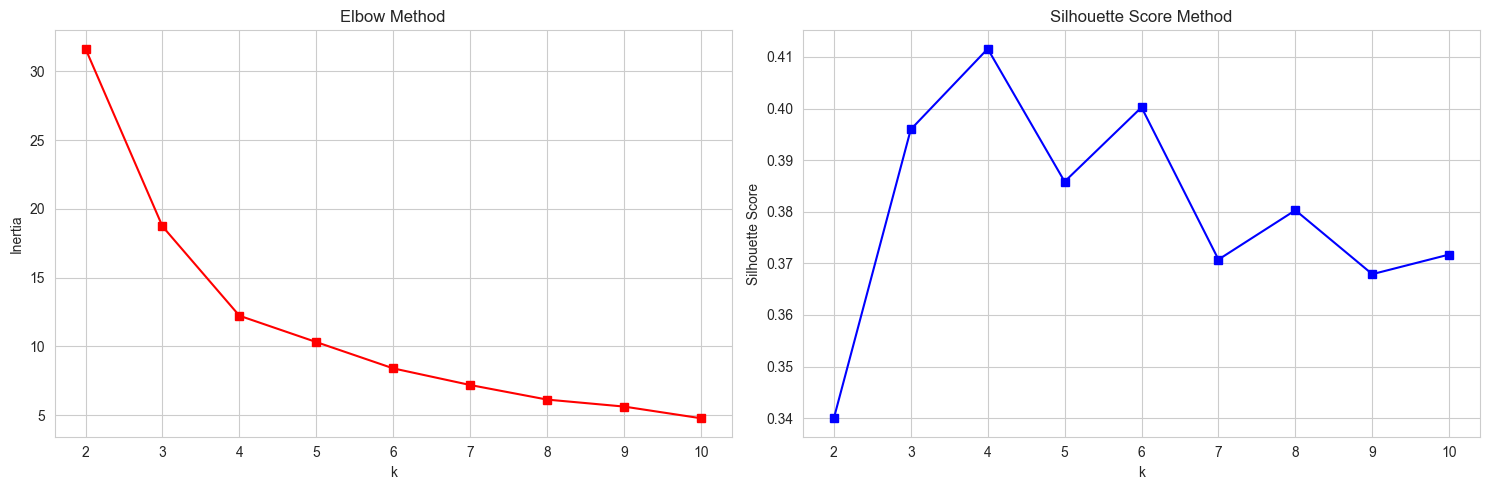

Based on both Elbow method and Silhouette scores, the optimal k appears to be 3


In [20]:
# calculate silhouette scores for different k values
silhouette_scores = []
K = range(2, 11)  # Start from 2 as silhouette score needs at least 2 clusters

for k in K:
	kmeans = KMeans(n_clusters=k, random_state=42)
	cluster_labels = kmeans.fit_predict(X)
	silhouette_avg = silhouette_score(X, cluster_labels)
	silhouette_scores.append(silhouette_avg)

# plot silhouette scores and elbow curve
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# elbow curve
ax1.plot(K, inertias[1:], "rs-")
ax1.set_xlabel("k")
ax1.set_ylabel("Inertia")
ax1.set_title("Elbow Method")
ax1.grid(True)

# silhouette scores
ax2.plot(K, silhouette_scores, "bs-")
ax2.set_xlabel("k")
ax2.set_ylabel("Silhouette Score")
ax2.set_title("Silhouette Score Method")
ax2.grid(True)

plt.tight_layout()
plt.show()

print("Based on both Elbow method and Silhouette scores, the optimal k appears to be 3")